In [1]:
import theory_P_cross_full as th
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# general dictionary
params={}
params['h'] = 0.6774
params['Obh2'] = 0.02230
params['Och2'] = 0.1188
params['mnu'] = 0.194
params['As'] = 2.142 # 10^9 * As
params['ns'] = 0.9667
params['alphas'] = -0.002
params['taure'] = 0.066
params['bHI'] = 2.82
params['OHI'] = 1.18e-3 * 1.e3
params['fast-model'] = 'cdm'
params['fast-realization'] = 'r1'
params['gadget-realization'] = 'r1'
params['gadget-model'] = 'cdm'
params['m_wdm'] = np.infty # for cdm is np.infty
params['band'] = 'g'
params['sigma8'] = 0.8159
params['telescope'] = 'skalow'
params['t_int'] = 1000
params['beam'] = 32 # think about this one
params['z_max_pk'] = 5.5 # only farmer would have 35 for running patchy class 
params['pickle'] = False # only farmer would have True here


In [3]:
sk1k_r1_cdm = th.theory_P_cross(params)

params['fast-model'] = '3keV'
params['gadget-model'] = '3keV'
params['m_wdm'] = 3.0
sk1k_r1_3keV = th.theory_P_cross(params)

params['fast-model'] = '4keV'
params['gadget-model'] = '4keV'
params['m_wdm'] = 4.0
sk1k_r1_4keV = th.theory_P_cross(params)

params['fast-model'] = '6keV'
params['gadget-model'] = '6keV'
params['m_wdm'] = 6.0
sk1k_r1_6keV = th.theory_P_cross(params)

params['fast-model'] = '9keV'
params['gadget-model'] = '9keV'
params['m_wdm'] = 9.0
sk1k_r1_9keV = th.theory_P_cross(params)

Using the default QLF
*********************** 

CAREFUL, CHECK THAT YOU ARE NOT USING THE NEW DATA THAT USES THE NEW PIXEL CLASS
*********************** 

Finished prepping the model for P_m
Currently at  3.6066014881638964
Using the default QLF
*********************** 

CAREFUL, CHECK THAT YOU ARE NOT USING THE NEW DATA THAT USES THE NEW PIXEL CLASS
*********************** 

Finished prepping the model for P_m
Currently at  3.6066014881638964
Using the default QLF
*********************** 

CAREFUL, CHECK THAT YOU ARE NOT USING THE NEW DATA THAT USES THE NEW PIXEL CLASS
*********************** 

Finished prepping the model for P_m
Currently at  3.6066014881638964
Using the default QLF
*********************** 

CAREFUL, CHECK THAT YOU ARE NOT USING THE NEW DATA THAT USES THE NEW PIXEL CLASS
*********************** 

Finished prepping the model for P_m
Currently at  3.6066014881638964
Using the default QLF
*********************** 

CAREFUL, CHECK THAT YOU ARE NOT USING THE NEW DATA THAT 

In [7]:
# Hyper parameters related to range
k_min_Mpc = np.log10(0.01) #* 0.6774
k_max_Mpc = np.log10(1.0) #* 0.6774
k_Mpc = np.logspace(k_min_Mpc,k_max_Mpc, 100)
print(k_Mpc)
epsilon = np.log10(k_Mpc[1]/k_Mpc[0])
print(epsilon)
Nk = len(k_Mpc)

[0.01       0.01047616 0.01097499 0.01149757 0.01204504 0.01261857
 0.01321941 0.01384886 0.01450829 0.01519911 0.01592283 0.01668101
 0.01747528 0.01830738 0.0191791  0.02009233 0.02104904 0.02205131
 0.0231013  0.02420128 0.02535364 0.02656088 0.02782559 0.02915053
 0.03053856 0.03199267 0.03351603 0.03511192 0.0367838  0.03853529
 0.04037017 0.04229243 0.04430621 0.04641589 0.04862602 0.05094138
 0.05336699 0.0559081  0.05857021 0.06135907 0.06428073 0.06734151
 0.07054802 0.07390722 0.07742637 0.08111308 0.08497534 0.08902151
 0.09326033 0.097701   0.1023531  0.10722672 0.1123324  0.1176812
 0.12328467 0.12915497 0.13530478 0.14174742 0.14849683 0.15556761
 0.16297508 0.17073526 0.17886495 0.18738174 0.19630407 0.20565123
 0.21544347 0.22570197 0.23644894 0.24770764 0.25950242 0.27185882
 0.28480359 0.29836472 0.31257158 0.32745492 0.34304693 0.35938137
 0.37649358 0.39442061 0.41320124 0.43287613 0.45348785 0.47508102
 0.49770236 0.52140083 0.54622772 0.57223677 0.59948425 0.62802

In [12]:
# 21cm
zi = 3.5
zf = 5.5
mu = 0.1

HI_sk1k_r1_cdm_zi = np.zeros(len(k_Mpc))
HI_sk1k_r1_3keV_zi = np.zeros(len(k_Mpc))
HI_sk1k_r1_4keV_zi = np.zeros(len(k_Mpc))
HI_sk1k_r1_6keV_zi = np.zeros(len(k_Mpc))
HI_sk1k_r1_9keV_zi = np.zeros(len(k_Mpc))

HI_sk1k_r1_cdm_zf = np.zeros(len(k_Mpc))
HI_sk1k_r1_3keV_zf = np.zeros(len(k_Mpc))
HI_sk1k_r1_4keV_zf = np.zeros(len(k_Mpc))
HI_sk1k_r1_6keV_zf = np.zeros(len(k_Mpc))
HI_sk1k_r1_9keV_zf = np.zeros(len(k_Mpc))

for i in range(0,len(k_Mpc)):
    HI_sk1k_r1_cdm_zi[i] = sk1k_r1_cdm.HIHI_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_cdm.HIHI_reio_Mpc_norm(zi, k_Mpc[i], mu)
    HI_sk1k_r1_3keV_zi[i] = sk1k_r1_3keV.HIHI_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_3keV.HIHI_reio_Mpc_norm(zi, k_Mpc[i], mu)
    HI_sk1k_r1_4keV_zi[i] = sk1k_r1_4keV.HIHI_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_4keV.HIHI_reio_Mpc_norm(zi, k_Mpc[i], mu)
    HI_sk1k_r1_6keV_zi[i] = sk1k_r1_6keV.HIHI_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_6keV.HIHI_reio_Mpc_norm(zi, k_Mpc[i], mu)
    HI_sk1k_r1_9keV_zi[i] = sk1k_r1_9keV.HIHI_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_9keV.HIHI_reio_Mpc_norm(zi, k_Mpc[i], mu)
    
    HI_sk1k_r1_cdm_zf[i] = sk1k_r1_cdm.HIHI_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_cdm.HIHI_reio_Mpc_norm(zf, k_Mpc[i], mu)
    HI_sk1k_r1_3keV_zf[i] = sk1k_r1_3keV.HIHI_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_3keV.HIHI_reio_Mpc_norm(zf, k_Mpc[i], mu)
    HI_sk1k_r1_4keV_zf[i] = sk1k_r1_4keV.HIHI_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_4keV.HIHI_reio_Mpc_norm(zf, k_Mpc[i], mu)
    HI_sk1k_r1_6keV_zf[i] = sk1k_r1_6keV.HIHI_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_6keV.HIHI_reio_Mpc_norm(zf, k_Mpc[i], mu)
    HI_sk1k_r1_9keV_zf[i] = sk1k_r1_9keV.HIHI_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_9keV.HIHI_reio_Mpc_norm(zf, k_Mpc[i], mu)
    


In [48]:
sk1k_r1_3keV.HIHI_reio_Mpc_norm(zf, 0.01, mu)/sk1k_r1_3keV.HIHI_base_Mpc_norm(zf, 0.01, mu)

-0.15129239674508088

In [44]:
sk1k_r1_cdm.HIHI_reio_Mpc_norm(zf, 0.01, mu)/sk1k_r1_cdm.HIHI_base_Mpc_norm(zf, 0.01, mu)

-0.1354284421085443

In [46]:
sk1k_r1_4keV.HIHI_reio_Mpc_norm(zf, 0.01, mu)/sk1k_r1_4keV.HIHI_base_Mpc_norm(zf, 0.01, mu)

-0.14378666435974827

In [47]:
sk1k_r1_9keV.HIHI_reio_Mpc_norm(zf, 0.01, mu)/sk1k_r1_9keV.HIHI_base_Mpc_norm(zf, 0.01, mu)

-0.13655854882373156

In [38]:
sk1k_r1_cdm.HIHI_base_Mpc_norm(zf, 0.1, mu)

4491.13057390474

In [39]:
sk1k_r1_3keV.HIHI_base_Mpc_norm(zf, 0.1, mu)

4491.091976425299

In [40]:
sk1k_r1_3keV.HIHI_reio_Mpc_norm(zf, 0.1, mu)

-677.9772509414695

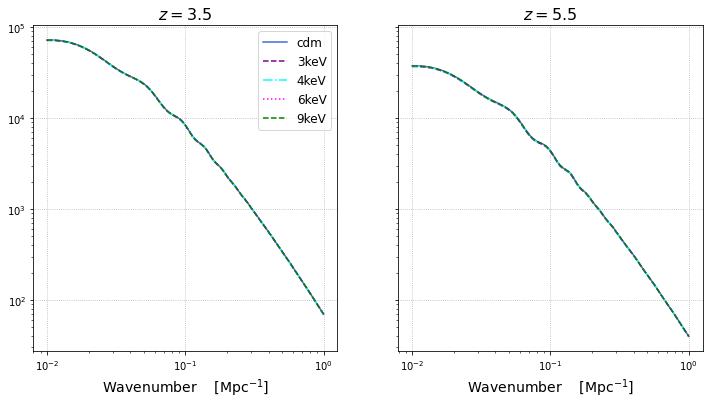

In [13]:
fig,axs = plt.subplots(1,2,figsize=(12,6),sharey='row')
axs[0].grid(linestyle='dotted')
axs[0].set_title(r'$z = 3.5$',fontsize=16)
axs[0].plot(k_Mpc, HI_sk1k_r1_cdm_zi, '-', color='royalblue', label='cdm')
axs[0].plot(k_Mpc, HI_sk1k_r1_3keV_zi, '--', color='purple', label='3keV')
axs[0].plot(k_Mpc, HI_sk1k_r1_4keV_zi, '-.', color='cyan', label='4keV')
axs[0].plot(k_Mpc, HI_sk1k_r1_6keV_zi, ':', color='magenta', label='6keV')
axs[0].plot(k_Mpc, HI_sk1k_r1_9keV_zi, '--', color='green', label='9keV')
axs[0].set_xlabel(r'Wavenumber    [Mpc$^{-1}$]', fontsize=14)
axs[0].legend(loc='best', fontsize=12)
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].set_title(r'$z = 5.5$',fontsize=16)
axs[1].plot(k_Mpc, HI_sk1k_r1_cdm_zf, '-', color='royalblue', label='cdm')
axs[1].plot(k_Mpc, HI_sk1k_r1_3keV_zf, '--', color='purple', label='3keV')
axs[1].plot(k_Mpc, HI_sk1k_r1_4keV_zf, '-.', color='cyan', label='4keV')
axs[1].plot(k_Mpc, HI_sk1k_r1_6keV_zf, ':', color='magenta', label='6keV')
axs[1].plot(k_Mpc, HI_sk1k_r1_9keV_zf, '--', color='green', label='9keV')
axs[1].grid(linestyle='dotted')
axs[1].set_xlabel(r'Wavenumber    [Mpc$^{-1}$]', fontsize=14)
axs[1].set_yscale('log')
axs[1].set_xscale('log')
plt.show()

In [29]:
# Lya
zi = 2.2
zf = 4.
mu = 0.1

Ly_sk1k_r1_cdm_zi = np.zeros(len(k_Mpc))
Ly_sk1k_r1_3keV_zi = np.zeros(len(k_Mpc))
Ly_sk1k_r1_4keV_zi = np.zeros(len(k_Mpc))
Ly_sk1k_r1_6keV_zi = np.zeros(len(k_Mpc))
Ly_sk1k_r1_9keV_zi = np.zeros(len(k_Mpc))

Ly_sk1k_r1_cdm_zf = np.zeros(len(k_Mpc))
Ly_sk1k_r1_3keV_zf = np.zeros(len(k_Mpc))
Ly_sk1k_r1_4keV_zf = np.zeros(len(k_Mpc))
Ly_sk1k_r1_6keV_zf = np.zeros(len(k_Mpc))
Ly_sk1k_r1_9keV_zf = np.zeros(len(k_Mpc))

for i in range(0,len(k_Mpc)):
    Ly_sk1k_r1_cdm_zi[i] = sk1k_r1_cdm.Forest.my_P.LyaLya_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_cdm.Forest.my_P.LyaLya_reio_Mpc_norm(zi, k_Mpc[i], mu)
    Ly_sk1k_r1_3keV_zi[i] = sk1k_r1_3keV.Forest.my_P.LyaLya_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_3keV.Forest.my_P.LyaLya_reio_Mpc_norm(zi, k_Mpc[i], mu)
    Ly_sk1k_r1_4keV_zi[i] = sk1k_r1_4keV.Forest.my_P.LyaLya_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_4keV.Forest.my_P.LyaLya_reio_Mpc_norm(zi, k_Mpc[i], mu)
    Ly_sk1k_r1_6keV_zi[i] = sk1k_r1_6keV.Forest.my_P.LyaLya_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_6keV.Forest.my_P.LyaLya_reio_Mpc_norm(zi, k_Mpc[i], mu)
    Ly_sk1k_r1_9keV_zi[i] = sk1k_r1_9keV.Forest.my_P.LyaLya_base_Mpc_norm(zi, k_Mpc[i], mu) + sk1k_r1_9keV.Forest.my_P.LyaLya_reio_Mpc_norm(zi, k_Mpc[i], mu)
    
    Ly_sk1k_r1_cdm_zf[i] = sk1k_r1_cdm.Forest.my_P.LyaLya_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_cdm.Forest.my_P.LyaLya_reio_Mpc_norm(zf, k_Mpc[i], mu)
    Ly_sk1k_r1_3keV_zf[i] = sk1k_r1_3keV.Forest.my_P.LyaLya_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_3keV.Forest.my_P.LyaLya_reio_Mpc_norm(zf, k_Mpc[i], mu)
    Ly_sk1k_r1_4keV_zf[i] = sk1k_r1_4keV.Forest.my_P.LyaLya_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_4keV.Forest.my_P.LyaLya_reio_Mpc_norm(zf, k_Mpc[i], mu)
    Ly_sk1k_r1_6keV_zf[i] = sk1k_r1_6keV.Forest.my_P.LyaLya_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_6keV.Forest.my_P.LyaLya_reio_Mpc_norm(zf, k_Mpc[i], mu)
    Ly_sk1k_r1_9keV_zf[i] = sk1k_r1_9keV.Forest.my_P.LyaLya_base_Mpc_norm(zf, k_Mpc[i], mu) + sk1k_r1_9keV.Forest.my_P.LyaLya_reio_Mpc_norm(zf, k_Mpc[i], mu)
    

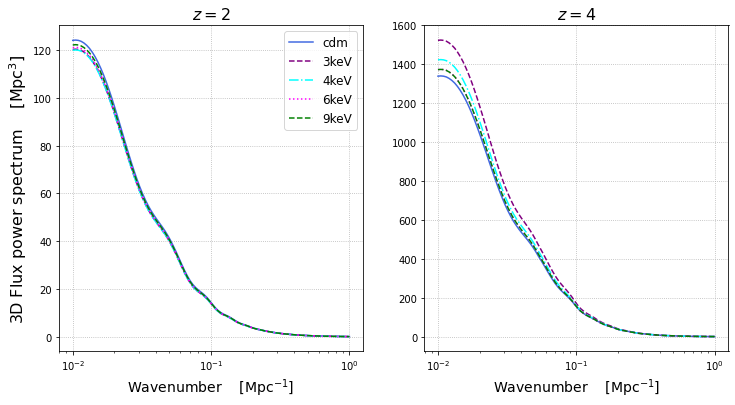

In [34]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
axs[0].grid(linestyle='dotted')
axs[0].set_title(r'$z = 2.$',fontsize=16)
axs[0].plot(k_Mpc, Ly_sk1k_r1_cdm_zi, '-', color='royalblue', label='cdm')
axs[0].plot(k_Mpc, Ly_sk1k_r1_3keV_zi, '--', color='purple', label='3keV')
axs[0].plot(k_Mpc, Ly_sk1k_r1_4keV_zi, '-.', color='cyan', label='4keV')
axs[0].plot(k_Mpc, Ly_sk1k_r1_6keV_zi, ':', color='magenta', label='6keV')
axs[0].plot(k_Mpc, Ly_sk1k_r1_9keV_zi, '--', color='green', label='9keV')
axs[0].set_ylabel(r'3D Flux power spectrum    [Mpc$^3$]', fontsize=16)
axs[0].set_xlabel(r'Wavenumber    [Mpc$^{-1}$]', fontsize=14)
axs[0].legend(loc='best', fontsize=12)
# axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[1].set_title(r'$z = 4.$',fontsize=16)
axs[1].plot(k_Mpc, Ly_sk1k_r1_cdm_zf, '-', color='royalblue', label='cdm')
axs[1].plot(k_Mpc, Ly_sk1k_r1_3keV_zf, '--', color='purple', label='3keV')
axs[1].plot(k_Mpc, Ly_sk1k_r1_4keV_zf, '-.', color='cyan', label='4keV')
axs[1].plot(k_Mpc, Ly_sk1k_r1_6keV_zf, ':', color='magenta', label='6keV')
axs[1].plot(k_Mpc, Ly_sk1k_r1_9keV_zf, '--', color='green', label='9keV')
axs[1].grid(linestyle='dotted')
axs[1].set_xlabel(r'Wavenumber    [Mpc$^{-1}$]', fontsize=14)
# axs[1].set_yscale('log')
axs[1].set_xscale('log')
plt.show()